In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.preprocessing import minmax_scaling
from sklearn import preprocessing
sns.set()
import pickle

# LOADING THE DATA

In [212]:
# importing the data for existing employees (ee)
ee = pd.read_excel(r"C:\Users\Que\Downloads\Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx", 1, index_col=0)

In [213]:
ee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
Emp ID,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,low
2002,0.82,0.67,2,202,3,0,0,sales,low
2003,0.45,0.69,5,193,3,0,0,sales,low
2004,0.78,0.82,5,247,3,0,0,sales,low
2005,0.49,0.60,3,214,2,0,0,sales,low


In [214]:
# importing the data for ex-employees (ex_e)
ex_e = pd.read_excel(r"C:\Users\Que\Downloads\Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx", 2, index_col=0)

In [215]:
ex_e.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
Emp ID,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,sales,low
2,0.80,0.86,5,262,6,0,0,sales,medium
3,0.11,0.88,7,272,4,0,0,sales,medium
4,0.72,0.87,5,223,5,0,0,sales,low
5,0.37,0.52,2,159,3,0,0,sales,low


Now that we have imported the data for employees and employees, we'll check to see if there are any anomalies or missing data.

In [216]:
ee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11428 entries, 2001 to 14211
Data columns (total 9 columns):
satisfaction_level       11428 non-null float64
last_evaluation          11428 non-null float64
number_project           11428 non-null int64
average_montly_hours     11428 non-null int64
time_spend_company       11428 non-null int64
Work_accident            11428 non-null int64
promotion_last_5years    11428 non-null int64
dept                     11428 non-null object
salary                   11428 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 892.8+ KB


In [217]:
ex_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 1 to 14999
Data columns (total 9 columns):
satisfaction_level       3571 non-null float64
last_evaluation          3571 non-null float64
number_project           3571 non-null int64
average_montly_hours     3571 non-null int64
time_spend_company       3571 non-null int64
Work_accident            3571 non-null int64
promotion_last_5years    3571 non-null int64
dept                     3571 non-null object
salary                   3571 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 279.0+ KB


There are no missing data. We're going to analyse solely the ex-employees data due to the fact that we're trying to figure out what type of employees are leaving and why they left.

# ANALYSING EX-EMPLOYEES DATA

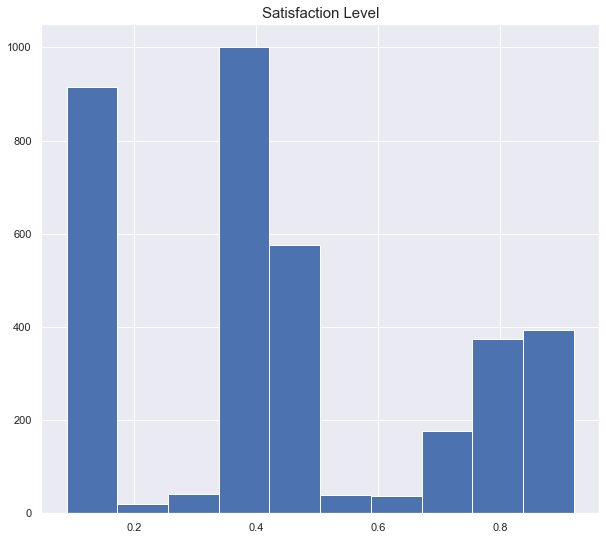

In [335]:
ex_e['satisfaction_level'].hist(figsize = (10,9))
plt.title("Satisfaction Level",fontdict = {'fontsize':15})
plt.savefig('satisfactionlevel.png', dpi=300, bbox_inches='tight')

From the histogram above, we can deduce that people with lower satisfaction level are more likely to leave the company.

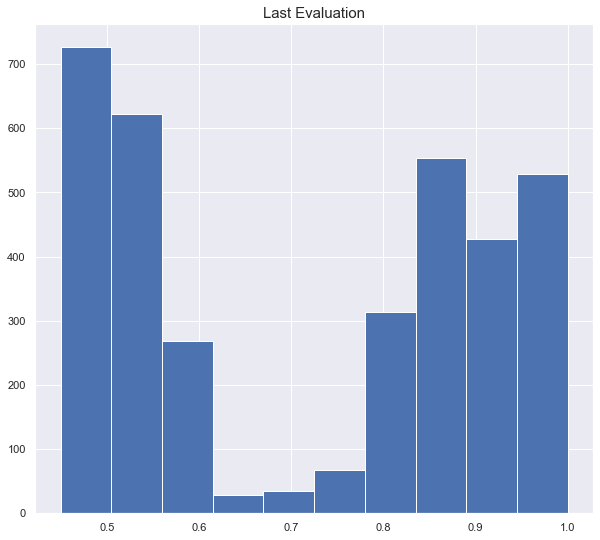

In [336]:
ex_e['last_evaluation'].hist(figsize = (10,9))
plt.title("Last Evaluation",fontdict = {'fontsize':15})
plt.savefig('lastevaluation.png', dpi=300, bbox_inches='tight')

We can see from the chart above that people with both low and high evaluations are leaving the company.

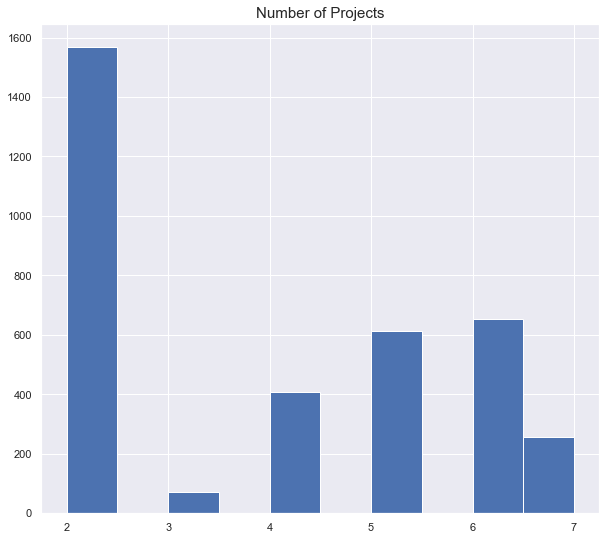

In [337]:
ex_e['number_project'].hist(figsize = (10,9))
plt.title("Number of Projects",fontdict = {'fontsize':15})
plt.savefig('numberproject.png', dpi=300, bbox_inches='tight')

The histogram above shows that people with small and big number of projects are leaving the company however, people with 2 or less projects are more likely to leave.

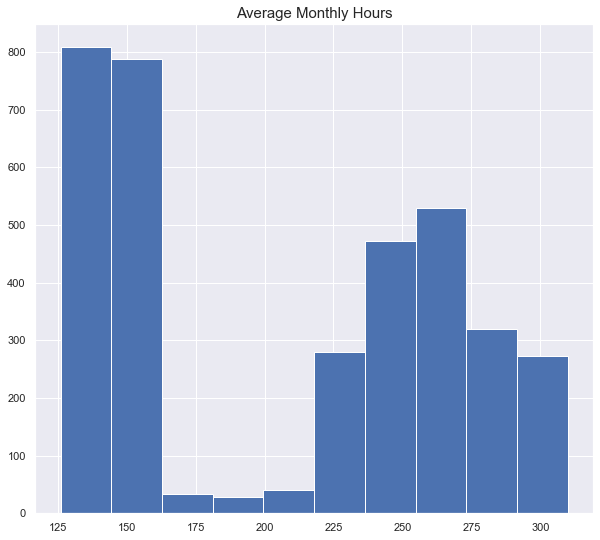

In [338]:
ex_e['average_montly_hours'].hist(figsize = (10,9))
plt.title("Average Monthly Hours",fontdict = {'fontsize':15})
plt.savefig('averagehours.png', dpi=300, bbox_inches='tight')

From the chart above, we can deduce that average montly hours has litlle effect on whether a person decides to leave as there are lots of people with low hours as well lots of people with more hours leaving. 

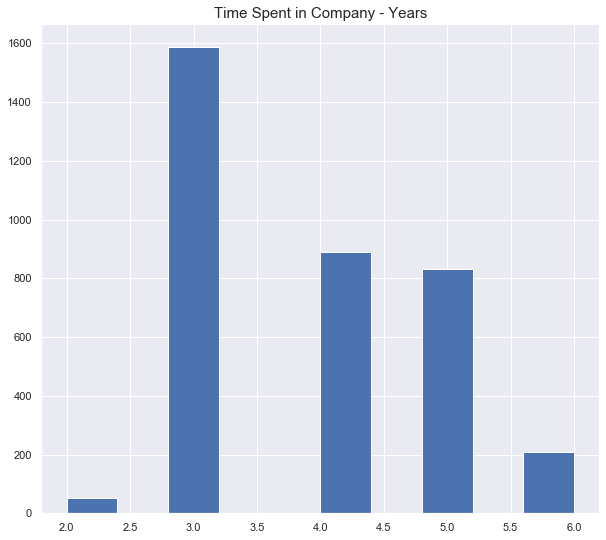

In [339]:
ex_e['time_spend_company'].hist(figsize = (10,9))
plt.title("Time Spent in Company - Years",fontdict = {'fontsize':15})
plt.savefig('timespent.png', dpi=300, bbox_inches='tight')

From the chart above, we can see that new entrants into the company are less likely to leave, however a lot of people starts leaving the company after 3 years. Most people leaving have spent between 3-5 years at the company. The rate however goes lower as they spend more years in the company.

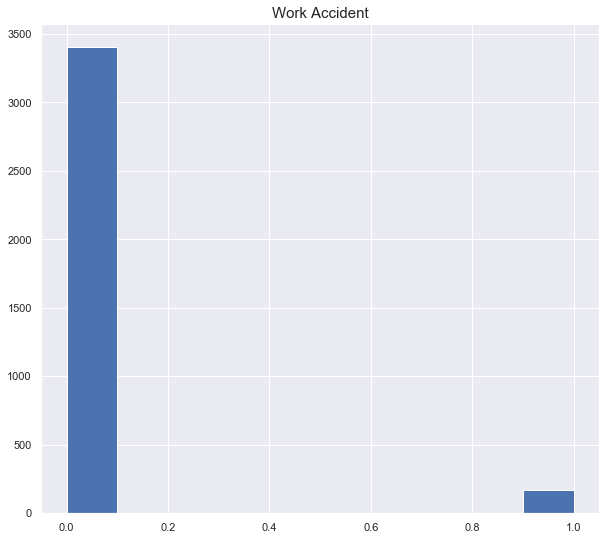

In [341]:
ex_e['Work_accident'].hist(figsize = (10,9))
plt.title("Work Accident",fontdict = {'fontsize':15})
plt.savefig('workaccident.png', dpi=300, bbox_inches='tight')

Most people leaving the company had no history of work accident, therefore accident has little to no role to play in why peeople are leaving the company.

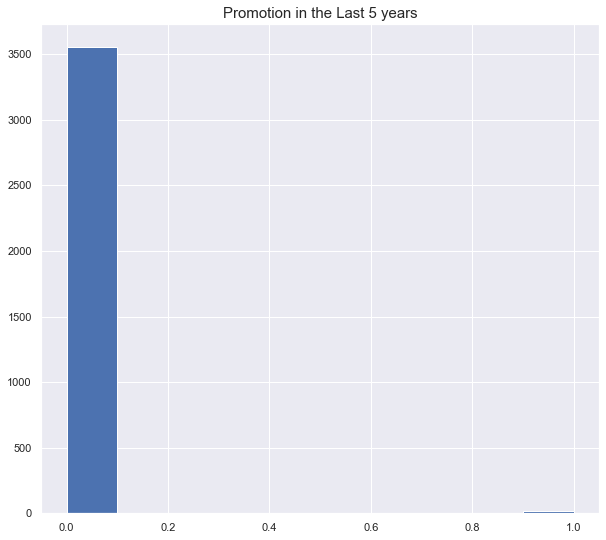

In [342]:
ex_e['promotion_last_5years'].hist(figsize = (10,9))
plt.title("Promotion in the Last 5 years",fontdict = {'fontsize':15})
plt.savefig('promotion.png', dpi=300, bbox_inches='tight')

Every one who left the company had no promotion in the last 5 years. This is a strong indication as to why people are leaving the company. Employees are likely leave a company if there's no chance for growth and advancement to seek it elsewhere.

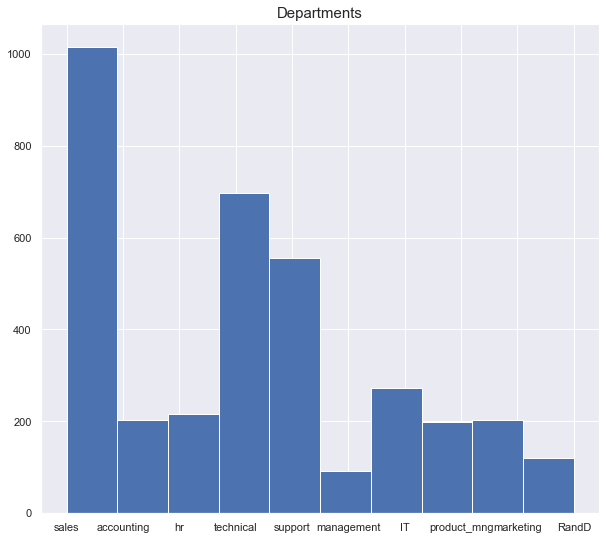

In [343]:
ex_e['dept'].hist(figsize = (10,9))
plt.title("Departments",fontdict = {'fontsize':15})
plt.savefig('dept.png', dpi=300, bbox_inches='tight')

Employees are leaving from all departments however, the rate at which they leave from the various departments differs from one another. Sales has the highest rate among employees leaving while management has the lowest.

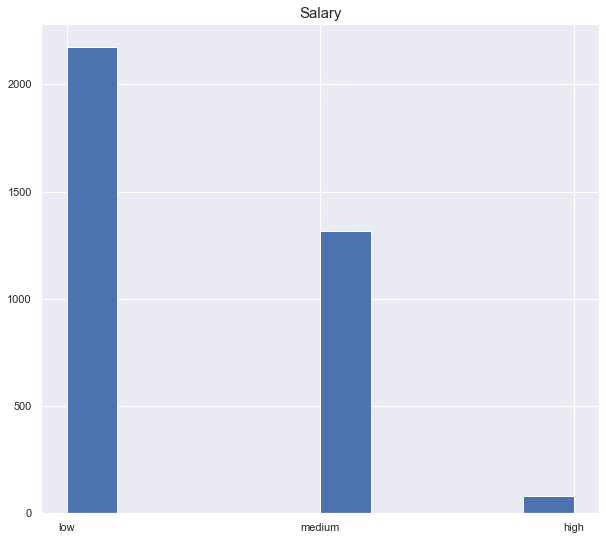

In [344]:
ex_e['salary'].hist(figsize = (10,9))
plt.title("Salary",fontdict = {'fontsize':15})
plt.savefig('salary.png', dpi=300, bbox_inches='tight')

Salary seems to be another strong indication as to why people are leaving. Majority of those who left the company are being paid low salaries. The rate of people leaving diminishes as their salary increases. People with high salaries seems less likely to leave the company.

Now that we have evaluated the ex-employee data, we will use information from this data to build a model that predicts the likelihood of an employee, leaving the company. Before we can do that, we need to prepare the data.

# PREPARING THE DATA

I will create a new column that shows employee status for the employee and ex-employee data set. The status of current employees will be 'current' and 'ex' for ex-employees

In [227]:
ee['employee_status'] = 'current'

In [228]:
ex_e['employee_status'] = 'ex'

Now, I will merge the two data set in order to build the model with data of current and ex-employees.

In [229]:
# all_e is all employees, both former and current.
combined_employees = [ee, ex_e]
all_e = pd.concat(combined_employees)

In [230]:
all_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 2001 to 14999
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
employee_status          14999 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 1.3+ MB


Now we prepare this data for modelling.
First, We will make the employee status numerical by mapping current employees to 0 and ex-employees to 1

In [231]:
all_e['employee_status']=all_e['employee_status'].map({'current' : 0, 'ex' : 1})

Now we make the employee_status column our output variable

In [232]:
Y = all_e['employee_status']

We will now create our predictor variables by dropping employee status

In [233]:
x = all_e.drop(columns=['employee_status'])

The value of 'dept' and salary column will be turned to numeric value with dummy.

In [234]:
x_with_dummies = pd.get_dummies(x)

In [235]:
x_with_dummies

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
Emp ID,,,,,,,,,,,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2002,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2003,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2004,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2005,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


The x_with_dummies is our input file.

In [323]:
input_file = x_with_dummies

In [324]:
input_file.to_excel("attrition_input_file.xlsx")

Now we scale the data to ensure each columns contribute proportionately to the model.

In [236]:
X = preprocessing.StandardScaler().fit(x_with_dummies).transform(x_with_dummies)

Now we split the data into training and test data

In [237]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [238]:
x_train.shape, y_train.shape

((13499, 20), (13499,))

In [239]:
x_test.shape, y_test.shape

((1500, 20), (1500,))

# Training the Model

In [240]:
reg = LogisticRegression()

In [241]:
reg.fit(x_train, y_train)

C:\Users\Que\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluating The Model

In [242]:
reg.score(x_train, y_train)

0.7917623527668716

We can conclude that our model has an accuracy of 80% (0.7917) when used on the training data.

In [243]:
reg.intercept_

array([-1.5990758])

In [244]:
reg.coef_

array([[-1.02817317,  0.128331  , -0.38511251,  0.22384384,  0.37462806,
        -0.5363933 , -0.18974204, -0.04779156, -0.11968959,  0.01218388,
         0.06689524, -0.06975813,  0.01201908, -0.02068829,  0.01076448,
         0.03567766,  0.05512899, -0.39155289,  0.23671285, -0.02143566]])

We will create a summary table for the coefficient

In [330]:
coef_summary = pd.DataFrame(zip(x_with_dummies.columns,np.transpose(reg.coef_)))
coef_summary.columns = ['Feature_name', 'Coefficient']

In [331]:
coef_summary

,Feature_name,Coefficient
0,satisfaction_level,[-1.0281731738997921]
1,last_evaluation,[0.1283310031437814]
2,number_project,[-0.38511250910905453]
3,average_montly_hours,[0.22384384345250555]
4,time_spend_company,[0.37462806428506706]
5,Work_accident,[-0.5363932983008746]
6,promotion_last_5years,[-0.18974204292778465]
7,dept_IT,[-0.04779156197990894]
8,dept_RandD,[-0.11968959083058969]
9,dept_accounting,[0.012183878556392778]


# Using our model to predict output

In [260]:
y_pred = reg.predict(x_train)

In [261]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [262]:
y_pred.shape

(13499,)

In [248]:
rmse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

In [249]:
r2

-0.14816736209034143

In [250]:
rmse

0.20823764723312838

# PLOTTING ACTUAL VALUES AGAINST OUR MODEL'S PREDICTED VALUE

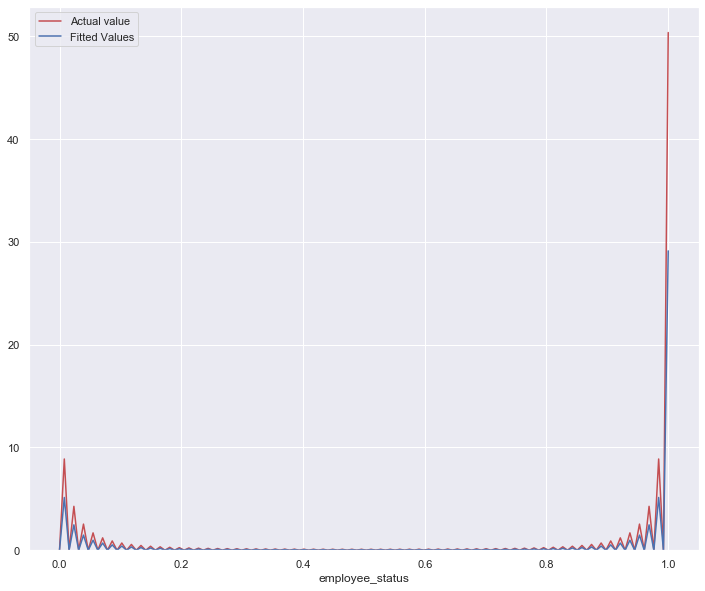

In [321]:
plt.figure(figsize=(12, 10))
ax1 =sns.distplot(y_train,hist=False,color='r',label='Actual value',)
sns.distplot(y_pred,hist=False,color='b',label='Fitted Values',ax=ax1)
plt.title("Distribution of Predicted Values Against Actual Values",fontdict = {'fontsize':15})
plt.savefig('modelchart.png', dpi=300, bbox_inches='tight')

## PREDICTING PROBABILITY

We can also predict the probability of an output to be zero or 1 i.e. curent or ex-employee

In [263]:
y_prob = reg.predict_proba(x_test)
y_prob

array([[0.98712857, 0.01287143],
       [0.96890592, 0.03109408],
       [0.92523849, 0.07476151],
       ...,
       [0.94891042, 0.05108958],
       [0.33628415, 0.66371585],
       [0.88432423, 0.11567577]])

There are two columns for y_prob, the first column is the probability the model assigned to the observation being 0 and
 the second column is the probability the model assigned to the observation being 1.

Since we are mostly concerned about the probability of an employee becoming an ex-employee i.e. output being 1, we can slice out values of the second column.

In [253]:
proba_1 = y_prob[:,1]

In [254]:
#Probability of an employee becoming an ex-employee
proba_1

array([0.01287143, 0.03109408, 0.07476151, ..., 0.05108958, 0.66371585,
       0.11567577])

# TESTING THE MODEL

Testing the model on the unseen test data.

In [255]:
reg.score(x_test, y_test)

0.792

We can conclude that our model has an accuracy of 80% (0.792) when used on the test data.

Remember we had to train the model with all employee data (all_e) by combining employee(ee) and ex-employee(ex_e) data.
This is because we wanted to teach the model how to identify the two instances of an employee being a current worker or an ex-employee.
Now we're going to use the model to make prediction on just the current employee data (ee) to see if we can identify employees most likely to leave.

# PREDICTING EMPLOYEE STATUS OF EXISTING EMPLOYES AND THEIR LIKELYHOOD OF LEAVING

## PREPARING THE DATA

In [264]:
x1 = ee.drop(columns=['employee_status'])

In [265]:
x1_with_dummies = pd.get_dummies(x1)

In [266]:
X2 = preprocessing.StandardScaler().fit(x1_with_dummies).transform(x1_with_dummies)

## MAKING THE PREDICTION

In [267]:
employee_pred = reg.predict(X2)

In [268]:
employee_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## PREDICTING THE PROBABILITY

In [269]:
employee_prob = reg.predict_proba(X2)

In [270]:
employee_prob

array([[0.6348543 , 0.3651457 ],
       [0.73552516, 0.26447484],
       [0.61724214, 0.38275786],
       ...,
       [0.9670889 , 0.0329111 ],
       [0.62563109, 0.37436891],
       [0.63426748, 0.36573252]])

## SLICING OUT THE PROBABILITY OF AN EXISTING EMPLOYEE TO BE AN EX-EMPLOYEE

In [271]:
employee_prob_ex = employee_prob[:,1]

In [272]:
employee_prob_ex

array([0.3651457 , 0.26447484, 0.38275786, ..., 0.0329111 , 0.37436891,
       0.36573252])

# OUTPUT SHOWING THE PREDICTION EMPLOYEES LIKELIHOOD TO LEAVE
AND THE PROBABILITY OF THE PREDICTION

In [273]:
output = ee

In [274]:
output ['Prediction'] = employee_pred

In [275]:
output ['Probability of becoming an ex-employee'] = employee_prob_ex

In [285]:
output

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,employee_status,Prediction,Probability of becoming an ex-employee
Emp ID,,,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,low,current,0,0.365146
2002,0.82,0.67,2,202,3,0,0,sales,low,current,0,0.264475
2003,0.45,0.69,5,193,3,0,0,sales,low,current,0,0.382758
2004,0.78,0.82,5,247,3,0,0,sales,low,current,0,0.158002
2005,0.49,0.60,3,214,2,0,0,sales,low,current,0,0.477660
...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.90,0.55,3,259,10,1,1,management,high,current,0,0.009393
14208,0.74,0.95,5,266,10,0,1,management,high,current,0,0.050986
14209,0.85,0.54,3,185,10,0,1,management,high,current,0,0.032911


In [325]:
output.to_excel("attrition_output_file.xlsx")

# SAVING THE MODEL

In [333]:
with open('attrition_model', 'wb') as file:
    pickle.dump(reg, file)